In [14]:
import cv2
import pandas as pd
import time
import deepface
from deepface import DeepFace
import mediapipe
# import dlib
import matplotlib.pyplot as plt
import imagehash
from PIL import Image
import time
import uuid  
import numpy as np
import math

In [34]:
pip install ImageHash

Note: you may need to restart the kernel to use updated packages.


In [15]:
df=pd.read_csv('emotion.csv')

### FPS record for input video

In [7]:
cap = cv2.VideoCapture("demos4.mp4")
prev_frame_time = 0
new_frame_time = 0
font=cv2.FONT_HERSHEY_SIMPLEX
while(True):
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.resize(frame, (500, 300))
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    new_frame_time = time.time()
    fps = 1/(new_frame_time-prev_frame_time)
    prev_frame_time = new_frame_time
    fps = int(fps)
    fps = str(fps)
    cv2.putText(frame,fps,(7, 70), font, 3, (100, 255, 0), 3, cv2.LINE_AA)
    cv2.imshow('frame',frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Facial analysis in demo

In [49]:
cap = cv2.VideoCapture(0)
# df.drop('Unnamed: 0',axis=1,inplace=True)
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe'
]

prev_frame_time = 0
  
# used to record the time at which we processed current frame
new_frame_time = 0

start_time = time.time()                             
while(True):

    ret,frame = cap.read()
    if not ret:
        break
    seconds = 3          # giving a time gap of 3sec
    current_time = time.ctime()
    c_time = time.time()
    elapsed_time = c_time - start_time
#     start_time=c_time
    new_frame_time = time.time()
    fps = 1/(new_frame_time-prev_frame_time)
    prev_frame_time = new_frame_time
    fps = int(fps)
    fps = str(fps)
    font = cv2.FONT_HERSHEY_SIMPLEX
    if int(elapsed_time)>=seconds:
        result = DeepFace.analyze(img_path = frame , actions=['emotion'], enforce_detection=False,detector_backend=backends[5])
        emotion = result[0]['dominant_emotion']
        percentage=result[0]['emotion'][emotion]
        percentagestr=str(percentage)
        time1=current_time.split(' ')[-2]
        start_time=c_time
              
        for dicts in result:
            x, y, w, h = dicts['region']['x'], dicts['region']['y'], dicts['region']['w'], dicts['region']['h']
            emotion = dicts['dominant_emotion']
            txt = str(emotion)
            rec=cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),1)
            face_np=frame[y:y+h,x:x+w,:]
            face_im=Image.fromarray(face_np)
            cv2.imwrite('face0.jpg',frame)
            
#             if face_verify("face0.jpg","face1.jpg"):
#                 hashcode=hashcode1
#                 cv2.imrwite("face1.jpg",face_im)
#             else :
#                 hashcode=str(uuid.uuid1())
            
            cv2.imshow('frame',rec)
            df1 = pd.DataFrame({"Emotion":txt,"Time elapsed": time1,"Percentage":percentage,"hash code":hashcode}, index=[1])
            df = df.append(df1)
            start_time = time.time()
            cv2.putText(frame,txt,(x+30,y),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,0,255),3)
            cv2.putText(frame,percentagestr,(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,0,255),3)
            cv2.putText(frame, hashcode, (7, 70), font, 3, (100, 255, 0), 3, cv2.LINE_AA)
            cv2.imshow('frame',frame)
            if face_verify("face0.jpg","face1.jpg"):
                hashcode=hashcode1
                cv2.imrwite("face1.jpg",face_im)
            else :
                hashcode=str(uuid.uuid1())
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

        
        

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.57it/s]


ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

In [33]:
cv2.imshow('face',face_np)

In [27]:
# VERIFICATION
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]
def face_verify(img1_path, img2_path):
    result=DeepFace.verify(img1_path, img2_path,model_name = models[0])
    hashcode1=str(uuid.uuid1())
    return result['verified']

In [17]:
# FUNCTION TO CHOOSE BEST FRAME
landmark=np.zeros((10,4))
rootsquare=[]
def best_frame():
    for i in range(10):
        result = DeepFace.analyze(img_path = frame , actions=['emotion'], enforce_detection=False,detector_backend=backends[5])
        x, y, w, h = result['region']['x'], result['region']['y'], result['region']['w'], result['region']['h']
        landmark[i]=[x,y,w,h]
        rootsquare[i]=modulus(landmark[i])
    index=rootsquare.index(min(rootsquare))
    best=landmark[index]
    return best
    
    
    
    
def modulus(arr):
    x=arr[0]
    y=arr[1]
    h=arr[2]
    w=arr[3]
    rootsq_val=math.sqrt(pow(arr[0],2)+pow(arr[1],2)+pow(arr[2],2)+pow(arr[3],2))
    return rootsq_val

In [27]:
print(modulus([1,2,3,4]))

5.477225575051661


In [28]:
face_verify("bhavit_1.jpg","bhavit_2.jpg")

True

In [ ]:
# # HERE I'LL MAKE A FUNCTION THAT WILL DETECT THE EMOTION AND MAKE THIS FUNCTION EXECUTABLE AFTER N SECONDS
# backends = [
#   'opencv', 
#   'ssd', 
#   'dlib', 
#   'mtcnn', 
#   'retinaface', 
#   'mediapipe'
# ]
# def emotionrecog(frame,df):
#     current_time = time.ctime()
#     c_time = time.time()
#     result = DeepFace.analyze(img_path = frame , actions=['emotion'], enforce_detection=False,detector_backend=backends[5])
#     emotion = result[0]['dominant_emotion']
#     percentage=result[0]['emotion'][emotion]
#     percentagestr=str(percentage)
#     time1=current_time.split(' ')[-2]
      
              
#     for dicts in result:
#         x, y, w, h = dicts['region']['x'], dicts['region']['y'], dicts['region']['w'], dicts['region']['h']
#         emotion = dicts['dominant_emotion']
#         txt = str(emotion+':')
#         cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),1)
# #             cv2.imshow('frame',rec)
#         df1 = pd.DataFrame({"Emotion":txt,"Time elapsed": time1,"Percentage":percentage}, index=[1])
#         df = df.append(df1)
        
#         cv2.putText(frame,txt,(240,620),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,0,255),3)
#         cv2.putText(frame,percentagestr,(300,620),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,0,255),3)
        
#         return df,x,y,w,h
# #         cv2.imshow('frame',frame)


# cap = cv2.VideoCapture(0)
# while(True):

#     ret,frame = cap.read()
#     if not ret:
#         break
#     starttime = time.time()
#     while True:
#         cv2.imshow('frame',frame)
#         # Remove the Time taken by code to execute
#         time.sleep(2 - ((time.time() - starttime) % 2))
#         emotionrecog(frame,df)
#         if cv2.waitKey(1) & 0xff == ord('q'):
#             break
# cap.release()
# cv2.destroyAllWindows()       
        

In [50]:
cap.release()

cv2.destroyAllWindows()  

In [37]:
result[0]['emotion'][emotion]

96.9829797744751

In [38]:
x,y,w,h

(227, 244, 157, 157)

In [39]:
frame.shape

(480, 640, 3)

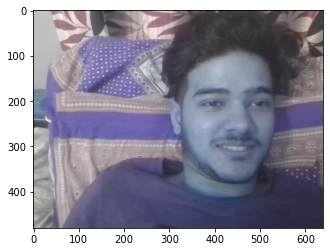

In [46]:
plt.imshow(frame)


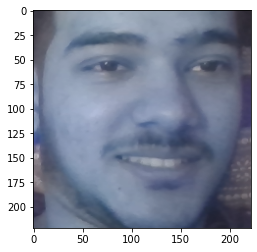

In [47]:

face1=frame[y:y+h,x:x+w,:]
plt.imshow(face1)


In [83]:
cv2.imwrite('face1.jpg',face1)

True

In [99]:
from PIL import Image
hash1=imagehash.average_hash(Image.open())
# Image.open('face1.jpg')

AttributeError: 'numpy.ndarray' object has no attribute 'convert'

In [85]:
print(hash1)

80d0c0f9fcc07030


In [86]:
face1.shape

(185, 185, 3)

In [33]:
# # FACE RECOGNITION USING EMBEDDINGS
# models = [
#   "VGG-Face", 
#   "Facenet", 
#   "Facenet512", 
#   "OpenFace", 
#   "DeepFace", 
#   "DeepID", 
#   "ArcFace", 
#   "Dlib", 
#   "SFace",
# ]
# embedding_objs = DeepFace.represent(img_path = face1, enforce_detection=False ,
#       model_name = models[2]
# )

In [42]:
result

[{'emotion': {'angry': 0.007956100307637826,
   'disgust': 4.493259741058034e-12,
   'fear': 3.821000049697432e-06,
   'happy': 96.9829797744751,
   'sad': 0.0028375219699228182,
   'surprise': 4.019318211589962e-06,
   'neutral': 3.0062181875109673},
  'dominant_emotion': 'happy',
  'region': {'x': 227, 'y': 244, 'w': 157, 'h': 157}}]

In [88]:
type(frame)

numpy.ndarray

In [89]:
frame.shape

(480, 640, 3)

In [90]:
len(result)

1

In [43]:
for emo in result:
    print(result[0]['dominant_emotion'])

happy


In [48]:
df

,Emotion,Time elapsed,Percentage,hash code
1,happy,19:59:44,94.675022,e937ee55-ff0b-11ed-bf4d-b07d649ae6cd
1,happy,19:59:45,93.0821,e937ee55-ff0b-11ed-bf4d-b07d649ae6cd
1,happy,19:59:45,94.076687,e937ee55-ff0b-11ed-bf4d-b07d649ae6cd
1,happy,19:59:45,95.560008,e937ee55-ff0b-11ed-bf4d-b07d649ae6cd
1,happy,19:59:45,97.022164,e937ee55-ff0b-11ed-bf4d-b07d649ae6cd
1,happy,19:59:46,93.541354,e937ee55-ff0b-11ed-bf4d-b07d649ae6cd
1,happy,19:59:46,65.466253,e937ee55-ff0b-11ed-bf4d-b07d649ae6cd
1,happy,19:59:46,97.750854,e937ee55-ff0b-11ed-bf4d-b07d649ae6cd
1,happy,19:59:46,98.610538,e937ee55-ff0b-11ed-bf4d-b07d649ae6cd
1,happy,19:59:46,89.064653,e937ee55-ff0b-11ed-bf4d-b07d649ae6cd


In [93]:
current_time

'Wed May 17 14:03:21 2023'

In [94]:
type(start_time)

float

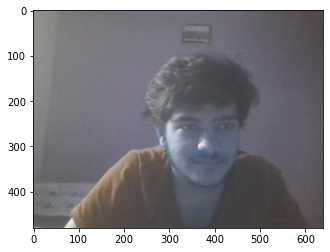

In [95]:
import matplotlib.pyplot as plt
plt.imshow(frame)

In [13]:
# cv2.imwrite('abcd.jpg', frame)

True

In [21]:
# ab = cv2.imread('abcd.jpg')
# res = DeepFace.analyze(img_path = ab , actions=['emotion'], enforce_detection=False,detector_backend=backends[3])

1/1 [==============================] - 0s 284ms/step


Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.27it/s]
